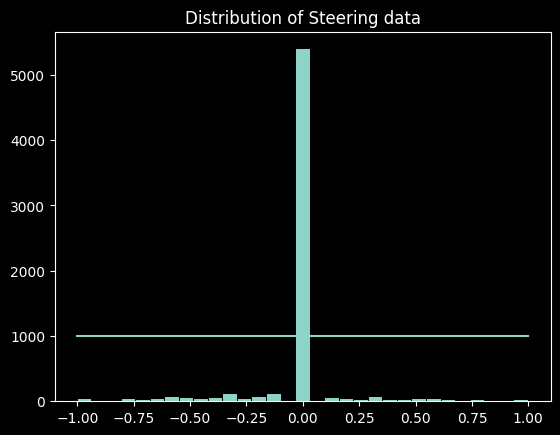

removed imgs:  4393
remain imgs:  2010


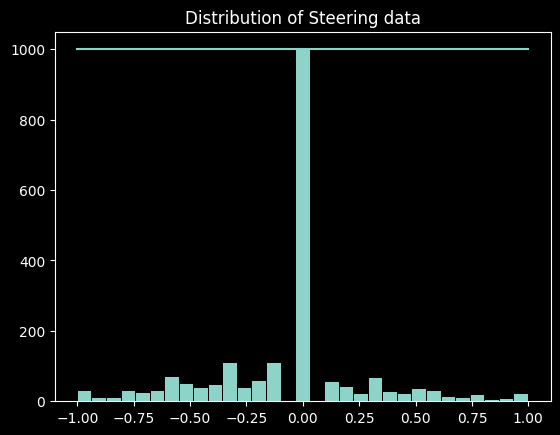

,Center,Left,Right,Steering,Throttle,Brake,Speed
10,center_2022_11_09_20_50_15_860.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.424289,0,0.534264
12,center_2022_11_09_20_50_16_088.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,1.000000,0,2.360276
15,center_2022_11_09_20_50_16_440.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,1.000000,0,6.792450
20,center_2022_11_09_20_50_17_091.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.35,0.044123,0,11.610780
21,center_2022_11_09_20_50_17_225.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.65,0.000000,0,11.266540
...,...,...,...,...,...,...,...
6374,center_2022_11_09_21_13_53_019.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,1.000000,0,30.208040
6381,center_2022_11_09_21_13_53_683.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,1.000000,0,30.190510
6383,center_2022_11_09_21_13_53_896.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.654141,0,30.108010
6390,center_2022_11_09_21_13_54_530.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.000000,0,28.615760


In [1]:
from helper import * 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

path = 'data'
df = load_data(f'{path}/driving_log.csv')
df = balance_data(df, 'Steering')
df

The car go straight most of the time that makes steering values around 0 extremely higher than the other. Drop the steering data to balance the whole dataset. 

In [2]:
img_path, steering = load_data_to_array(path, df)
# fixed value for random_state to keep train and test datasets same each time
X_train, X_val, Y_train, Y_val = train_test_split(img_path, steering, test_size=0.2, random_state=1) 
X_train, Y_train = img_preprocess_pipeline(X_train, Y_train, 1)
X_val, Y_val = img_preprocess_pipeline(X_val, Y_val, 0 )

print(X_train.shape)
print(Y_train.shape)
print("Training imgs: ", len(X_train))
print("Test imgs: ", len(X_val))

(1608, 70, 200, 3)
(1608,)
Training imgs:  1608
Test imgs:  402


In [3]:
import wandb
from wandb.keras import WandbCallback
from wandb_config import sweep_config

wandb.init(project='cnn_thesis')

sweep_id = wandb.sweep(sweep_config, project='cnn_thesis')
log_callback = WandbCallback(log_evaluation=True)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: viettran. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Create sweep with ID: 6yx4y7wx
Sweep URL: https://wandb.ai/viettran/cnn_thesis/sweeps/6yx4y7wx


In [4]:

def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        
        optim = build_optimizer(config.optimizer, config.learning_rate)
        model = build_network(activation=config.activation, optimizer=optim, dropout=config.dropout)
        
        model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=config.batch_size,
                        verbose=1, epochs=config.epochs, callbacks=[log_callback])

In [5]:
wandb.agent(sweep_id, train, count=20)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: rbwz3l2g with config:
wandb: 	activation: tanh
wandb: 	batch_size: 25
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: adam
Exception in thread ChkStopThr:
Traceback (most recent call last):
  File "C:\Users\viet tran\AppData\Local\Programs\Python\Python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\viet tran\AppData\Local\Programs\Python\Python38\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\viet tran\Desktop\Masterthesis\Program\venv_cnn\lib\site-packages\wandb\sdk\wandb_run.py", line 200, in check_status
    status_response = self._interface.communicate_stop_status()
Exception in thread   File "c:\Users\viet tran\Desktop\Masterthesis\Program\venv_cnn\lib\site-packages\wandb\sdk\interface\interface.py", line 128, in communicate_stop_status
    NetStatThrresp = 

Epoch 1/15
 1/65 [..............................] - ETA: 7:46 - loss: 0.5637 - acc: 0.2400

In [ ]:
''' 
Iterations: number of batches to complete one epoch 
Batches: number of training samples in one iteration 
Steps per epoch = number of training sample // batch size
'''
